## Tacotron2 (Baseline TTS)

In [10]:
sample_text = '''
Marijuana legalization presents an opportunity to promote public health, reduce crime, and generate tax revenue. 
Evidence suggests that regulation can ensure safer consumption, reduce the burden on the criminal justice system, and direct law enforcement resources toward more serious crimes. 
Additionally, the economic benefits of legal cannabis industries, including job creation and tax revenue, have been demonstrated in states where it is already legal. 
By focusing on regulation over prohibition, we can ensure a more effective and balanced approach to marijuana use and its societal impact.
'''

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
Tacotron2 = TTS("tts_models/en/ljspeech/tacotron2-DDC").to(device)

100%|██████████| 896M/896M [15:06<00:00, 989kiB/s] 
100%|██████████| 113M/113M [00:03<00:00, 37.1MiB/s]
 54%|█████▍    | 2.06M/3.80M [00:00<00:00, 16.0MiB/s]

100%|██████████| 3.80M/3.80M [00:11<00:00, 16.0MiB/s]

In [12]:
Tacotron2.tts_to_file(
    sample_text,
    file_path="good_outputs/taco2_speaker_base.wav"
)

'good_outputs/taco2_speaker_base.wav'

## FreeVC

In [ ]:
import torch
from TTS.api import TTS

device = "cuda" if torch.cuda.is_available() else "cpu"
FreeVC = TTS("voice_conversion_models/multilingual/vctk/freevc24").to(device)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/coqpit/coqpit.py:864: UserWarning: Type mismatch in FreeVCConfig
Failed to deserialize field: test_sentences (list[str]) = [["It took me quite a long time to develop a voice, and now that I have it I'm not going to be silent."], ['Be a voice, not an echo.'], ["I'm sorry Dave. I'm afraid I can't do that."], ["This cake is great. It's so delicious and moist."], ['Prior to November 22, 1963.']]
Replaced it with field's default value: []
  self.deserialize(data)


'good_outputs/Obama/obama_to_taco2.wav'

In [ ]:
# Obama
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Obama/obama_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Obama/obama_to_taco2.wav"
    
)

In [14]:
# Trump
FreeVC.voice_conversion_to_file(
    source_wav="good_outputs/Trump/trump_output_fishspeech.wav",
    target_wav="good_outputs/taco2_speaker_base.wav",
    file_path="good_outputs/Trump/trump_to_taco2.wav"
)

'good_outputs/Trump/trump_to_taco2.wav'

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
# function to generation mel spectrogram
def show_mel_spectrogram(filepath, title):
    array, sr = librosa.load(filepath)
    S = librosa.feature.melspectrogram(y=array, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    plt.figure().set_figwidth(12)
    librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sr)    
    plt.title(title)

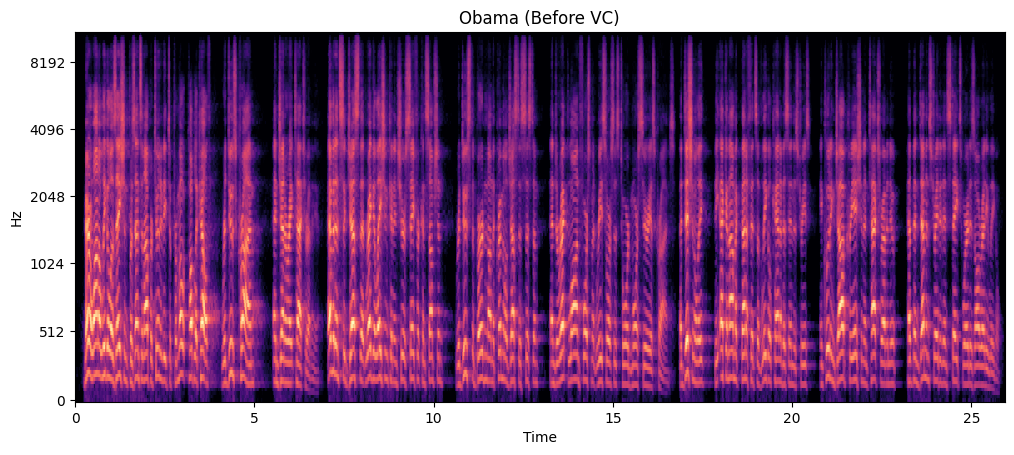

In [10]:
# Obama: generate before mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_output_fishspeech.wav", title="Obama (Before VC)")

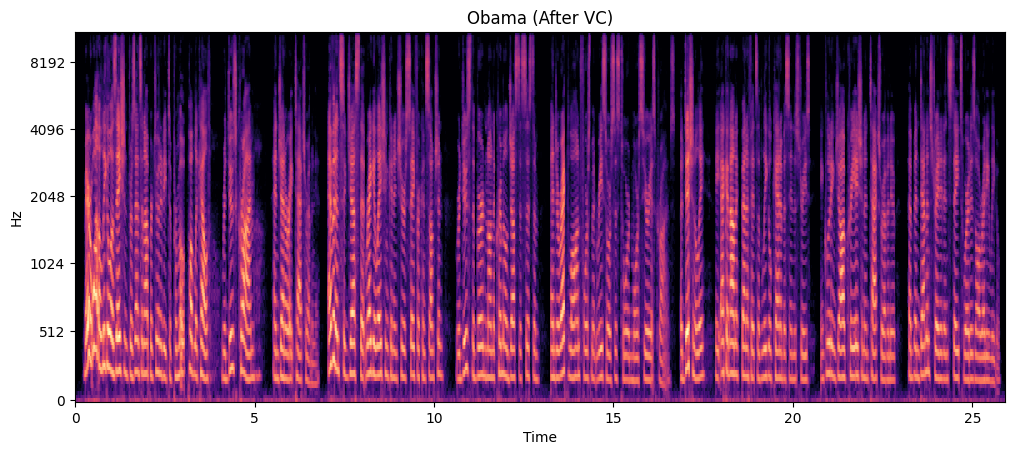

In [11]:
# Obama: generate after mel
show_mel_spectrogram(filepath="good_outputs/Obama/obama_to_taco2.wav", title="Obama (After VC)")

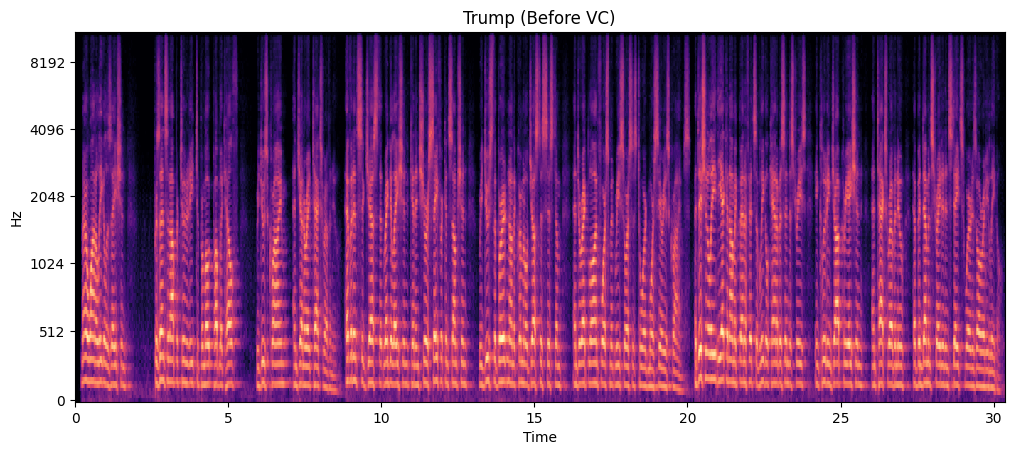

In [ ]:
# Trump: generate before mel 
show_mel_spectrogram("good_outputs/Trump/trump_output_fishspeech.wav", title="Trump (Before VC)")

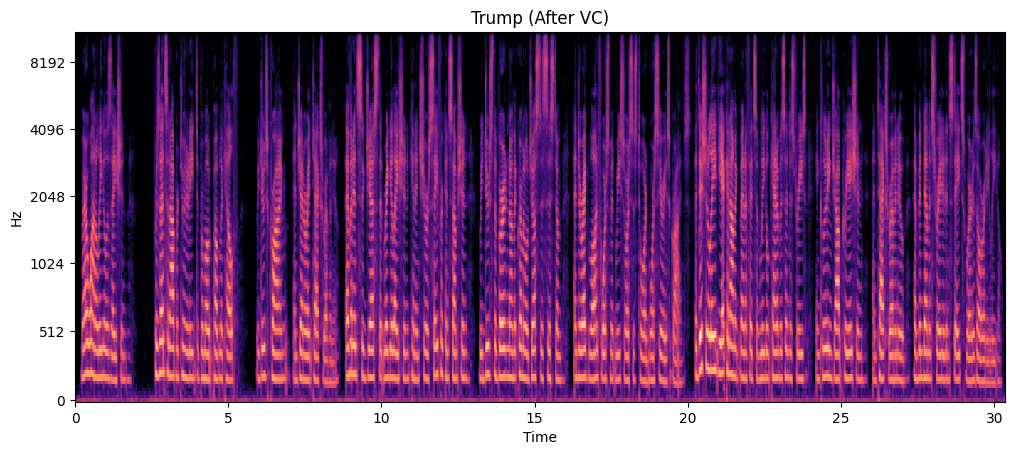

In [13]:
# Trump: generate after mel
show_mel_spectrogram("good_outputs/Trump/trump_to_taco2.wav", title="Trump (After VC)")

## kNN-VC

## OpenVoice

In [7]:
FreeVC.list_models()

['tts_models/multilingual/multi-dataset/xtts_v2',
 'tts_models/multilingual/multi-dataset/xtts_v1.1',
 'tts_models/multilingual/multi-dataset/your_tts',
 'tts_models/multilingual/multi-dataset/bark',
 'tts_models/bg/cv/vits',
 'tts_models/cs/cv/vits',
 'tts_models/da/cv/vits',
 'tts_models/et/cv/vits',
 'tts_models/ga/cv/vits',
 'tts_models/en/ek1/tacotron2',
 'tts_models/en/ljspeech/tacotron2-DDC',
 'tts_models/en/ljspeech/tacotron2-DDC_ph',
 'tts_models/en/ljspeech/glow-tts',
 'tts_models/en/ljspeech/speedy-speech',
 'tts_models/en/ljspeech/tacotron2-DCA',
 'tts_models/en/ljspeech/vits',
 'tts_models/en/ljspeech/vits--neon',
 'tts_models/en/ljspeech/fast_pitch',
 'tts_models/en/ljspeech/overflow',
 'tts_models/en/ljspeech/neural_hmm',
 'tts_models/en/vctk/vits',
 'tts_models/en/vctk/fast_pitch',
 'tts_models/en/sam/tacotron-DDC',
 'tts_models/en/blizzard2013/capacitron-t2-c50',
 'tts_models/en/blizzard2013/capacitron-t2-c150_v2',
 'tts_models/en/multi-dataset/tortoise-v2',
 'tts_mode